#  Student Performance Optimization Model

## **🔹 Project Overview**
This project aims to **optimize student performance** by adjusting study hours, practice papers, and sleep hours to **maximize the Performance Index** using **Linear Programming (LP)**.

## **🔹 Objective**
To find the best combination :
- 📚 **Study Hous**
- ✍ **Practice Paps**
- 😴 **Sleep Hours**  
that will **maximize the Performance Index**.

## **🔹 Constraints**
- **Study Hours (X1)**: Between **0 and 10** hours  
- **Practice Papers (X2)**: Between **0 and 10** papers  
- **Sleep Hours (X3)**: Between **4 and 9** hours  
- **Total Effort Constraint**: **Study + Practice ≤ tplotlib pandas numpy


In [1]:
 #Installing and Importing Required Libraries

!pip install pulp

   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/17.7 MB 4.3 MB/s eta 0:00:05
    --------------------------------------- 0.3/17.7 MB 3.8 MB/s eta 0:00:05
   - -------------------------------------- 0.5/17.7 MB 3.9 MB/s eta 0:00:05
   - -------------------------------------- 0.7/17.7 MB 4.7 MB/s eta 0:00:04
   -- ------------------------------------- 1.0/17.7 MB 4.5 MB/s eta 0:00:04
   -- ------------------------------------- 1.2/17.7 MB 4.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.5/17.7 MB 4.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.7/17.7 MB 4.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.9/17.7 MB 4.6 MB/s eta 0:00:04
   ---- ----------------------------------- 2.1/17.7 MB 4.7 MB/s eta 0:00:04
   ----- ---------------------------------- 2.3/17.7 MB 4.6 MB/s eta 0:00:04
   ----- ---------------------------------- 2.5/17.7 MB 4.6 MB/s eta 0:00:04
   ---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpVariable
import joblib


### Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv("student_performance.csv")

# Display first few rows
print(df.head())

# Check data types and missing values
print(df.info())
print(df.isnull().sum())


   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1                 91  
1                                 2                 65  
2                                 2                 45  
3                                 2                 36  
4                                 5                 66  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------               

### Define the Optimization Model

In [3]:
# Define the problem
model = LpProblem("Student_Performance_Optimization", LpMaximize)

# Define decision variables
X1 = LpVariable("Hours_Studied", lowBound=0, upBound=10, cat="Continuous")  # Study hours
X2 = LpVariable("Practice_Papers", lowBound=0, upBound=10, cat="Integer")  # Practice papers
X3 = LpVariable("Sleep_Hours", lowBound=4, upBound=9, cat="Continuous")  # Sleep hours

# Objective function: Maximize Performance Index
model += 8 * X1 + 6 * X2 + 3 * X3, "Performance_Index"

# Constraints
model += X1 + X2 <= 15, "Total Effort Constraint"  # Study + Practice ≤ 15
model += X3 >= 4, "Minimum Sleep Constraint"
model += X3 <= 9, "Maximum Sleep Constraint"

# Solve the model
model.solve()



1

### Print and Analyze the Results

In [4]:
# Print results
print(f"Optimal Hours Studied: {X1.varValue}")
print(f"Optimal Number of Practice Papers: {X2.varValue}")
print(f"Optimal Sleep Hours: {X3.varValue}")
print(f"Maximum Performance Index: {model.objective.value()}")


Optimal Hours Studied: 10.0
Optimal Number of Practice Papers: 5.0
Optimal Sleep Hours: 9.0
Maximum Performance Index: 137.0


### Visualize the Optimization Constraints

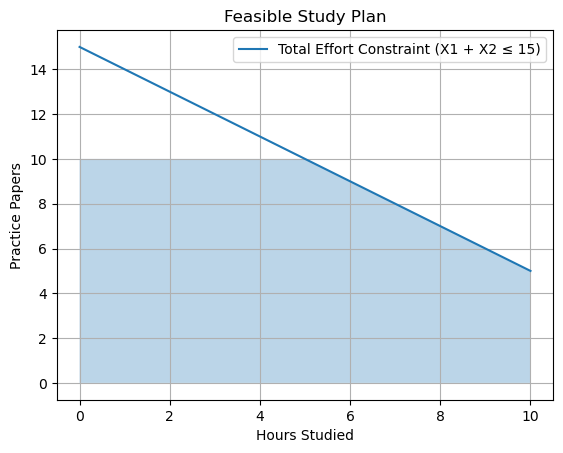

In [5]:
# Define values
x = np.linspace(0, 10, 100)  # Range for study hours
effort_constraint = 15 - x  # Rearranging X1 + X2 ≤ 15

# Plot constraints
plt.plot(x, effort_constraint, label="Total Effort Constraint (X1 + X2 ≤ 15)")
plt.fill_between(x, 0, np.minimum(effort_constraint, 10), alpha=0.3)

# Labels and legend
plt.xlabel("Hours Studied")
plt.ylabel("Practice Papers")
plt.title("Feasible Study Plan")
plt.legend()
plt.grid()
plt.show()


### Save the Model for Future Use

In [6]:
# Save trained model
joblib.dump(model, "student_optimization_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [7]:
!pip install numpy pandas scikit-learn matplotlib seaborn


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [9]:
# Display first few rows
print(df.head())

# Check data types and missing values
print(df.info())
print(df.isnull().sum())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1                 91  
1                                 2                 65  
2                                 2                 45  
3                                 2                 36  
4                                 5                 66  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------               

## Select Only Numerical Features

#### Since PCA works on numerical data, we need to filter out non-numeric columns.

#### 📌 Dataset Columns:

#### Hours Studied ✅
#### Previous Scores ✅
#### Sleep Hours ✅
#### Sample Question Papers Practiced ✅
#### Performance Index (Target) (We exclude this for PCA)
#### python
#### Copy
#### Edit


In [10]:
# Select numerical columns (excluding the target variable)
numerical_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

# Extract numerical data
X = df[numerical_cols]


#### Normalize the Data (Standardization)

In [11]:
# Since PCA is sensitive to scale differences, we standardize all numerical features.
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols)

# Display normalized data
print(X_scaled_df.head())


   Hours Studied  Previous Scores  Sleep Hours  \
0       0.775188         1.704176     1.456205   
1      -0.383481         0.723913    -1.492294   
2       1.161410        -1.063626     0.276805   
3       0.002742        -1.005963    -0.902594   
4       0.775188         0.320275     0.866505   

   Sample Question Papers Practiced  
0                         -1.249754  
1                         -0.900982  
2                         -0.900982  
3                         -0.900982  
4                          0.145333  


#### Apply PCA

In [12]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Display PCA-transformed data
print(pca_df.head())


        PC1       PC2
0  0.338888 -1.397674
1  1.185286  0.429745
2 -0.488992  1.250297
3  0.526131  1.533220
4 -0.721424 -0.551429


### Visualize the PCA Variance Explained

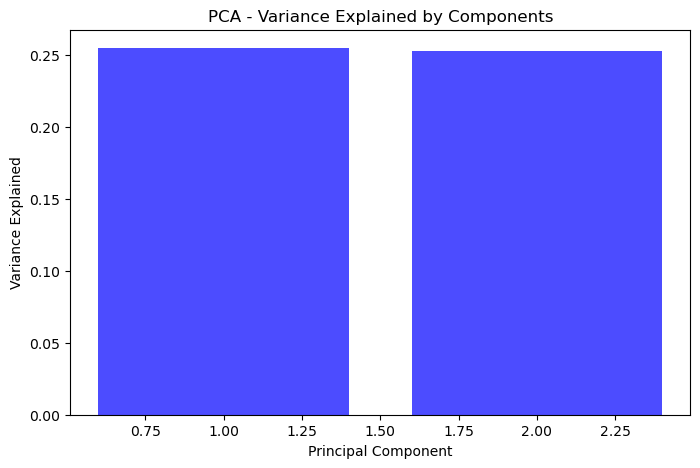

In [13]:

# Check how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_

# Plot variance explained by each component
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("PCA - Variance Explained by Components")
plt.show()


###  Visualize the PCA Components in a Scatter Plot

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

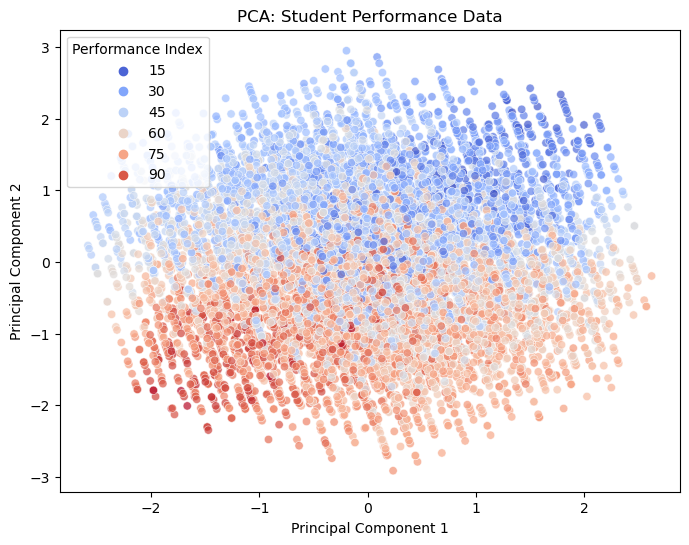

In [15]:
# Add Performance Index for color mapping
pca_df['Performance Index'] = df['Performance Index']

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["Performance Index"], palette="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Student Performance Data")
plt.colorbar()
plt.show()
